# Getting Started
This notebook shows you how to run Principal Component Analysis (PCA) using Python and Numpy, and graph your results using Matplotlib.  Each box shows you a code example of how to do a step.  To run a step, click on that code box and then click the Play button above (just left of the STOP button).

## Step 1: Initial Setup
We first need to get ready to use Numpy, Matplotlib, and define a few convenience functions to make PCA easier. Click on the following code box, and click the Play button above; you should then see a simple graph:

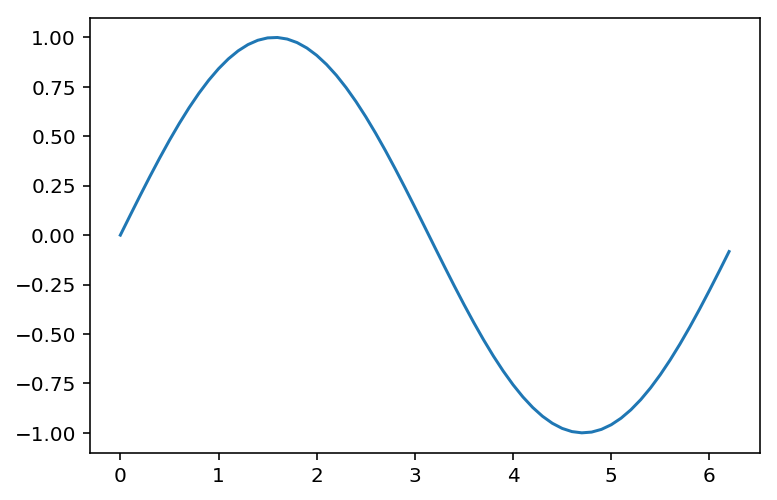

In [1]:
# import the libraries we need
import numpy
from matplotlib import pyplot
from math import cos, sin, pi
# make this notebook display graphs automatically
%matplotlib inline

# define convenience functions
def get_rotation_matrix(theta=0.5, isDegrees=True):
    if isDegrees:
        theta *= pi / 180.
    r = numpy.matrix(((cos(theta), -sin(theta)), (sin(theta), cos(theta))))
    return r

def sort_pca(pca_vars, pca_axes):
    s = list(zip(pca_vars, pca_axes.T))
    s.sort(reverse=True)
    eig_vals2 = numpy.array([t[0] for t in s])
    eig_vecs2 = numpy.matrix([t[1] for t in s]).T
    return eig_vals2, eig_vecs2

def recenter(vecs):
    m = numpy.matrix(vecs).mean(axis=1)
    return numpy.array(vecs - m), numpy.array(m)

# display a graph of SIN(X)
rads = numpy.arange(0, 2*pi, 0.1)
pyplot.plot(rads, numpy.sin(rads))

## Step 2: Human Height vs. Weight Dataset
The following code box shows how to enter a simple dataset of (height, weight) pairs, convert it from row-format to column-format (i.e. each datapoint is represented by one column in the data array), which is convenient for numpy calculations and graphing.  Click on the code box and click the Play button above, to graph these data:

(10, 130)

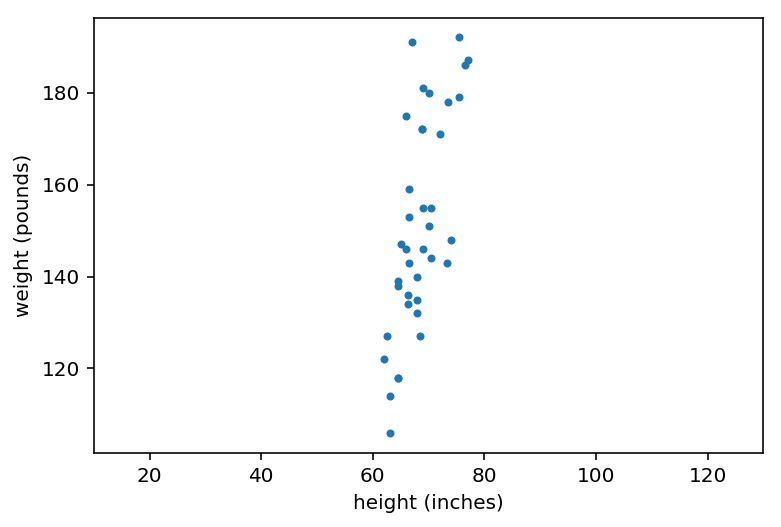

In [2]:
rows = [[64.5, 118.0], [73.3, 143.0], [68.8, 172.0], [65.0, 147.0], [69.0, 146.0], [64.5, 138.0], [66.0, 175.0], [66.3, 134.0], [68.8, 172.0], [64.5, 118.0], [70.0, 151.0], [69.0, 155.0], [70.5, 155.0], [66.0, 146.0], [68.0, 135.0], [68.5, 127.0], [73.5, 178.0], [66.3, 136.0], [70.0, 180.0], [76.5, 186.0], [62.0, 122.0], [68.0, 132.0], [63.0, 114.0], [72.0, 171.0], [68.0, 140.0], [77.0, 187.0], [63.0, 106.0], [66.5, 159.0], [62.5, 127.0], [67.0, 191.0], [75.5, 192.0], [69.0, 181.0], [66.5, 143.0], [66.5, 153.0], [70.5, 144.0], [64.5, 139.0], [74.0, 148.0], [75.5, 179.0]]
hw = numpy.array(rows).T # transpose to column format
hwc, m = recenter(hw) # recentered on (0,0)
pyplot.plot(hw[0], hw[1], marker='.', linestyle='')
pyplot.xlabel('height (inches)')
pyplot.ylabel('weight (pounds)')
pyplot.xlim(xmin=10, xmax=130)

## Step 3: What is a Rotation Matrix?
A rotation matrix represents a rotated coordinate system as a table whose columns are the coordinates of its axes.  The following code example shows how to get a 2D rotation matrix for a 30 degree (counter-clockwise) rotation, print it, and graph its axes (column vectors):

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


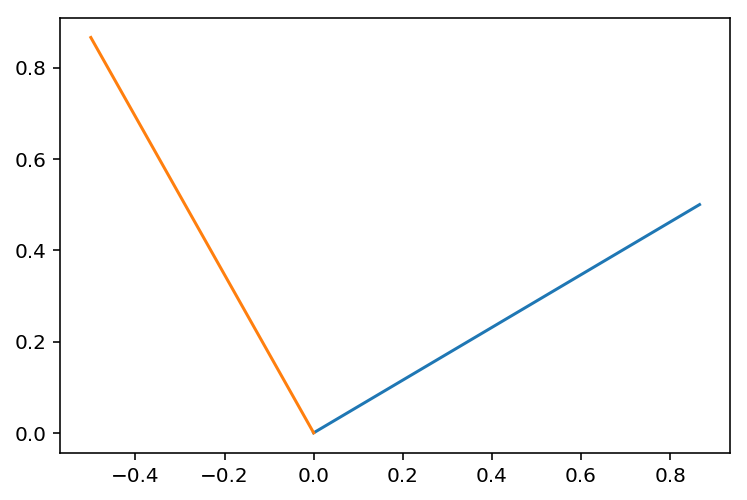

In [3]:
r = get_rotation_matrix(30)
print(r)
pyplot.plot((0,r[0,0]), (0,r[1,0]))
pyplot.plot((0,r[0,1]), (0,r[1,1]))

## Step 4: Rotating a Dataset
Multiplying a dataset by a rotation matrix has the effect of rotating it by that amount (around the origin (0,0)).  Here we rotate the dataset (centered at (0,0)) by our rotation matrix and graph the result:

(-50, 70)

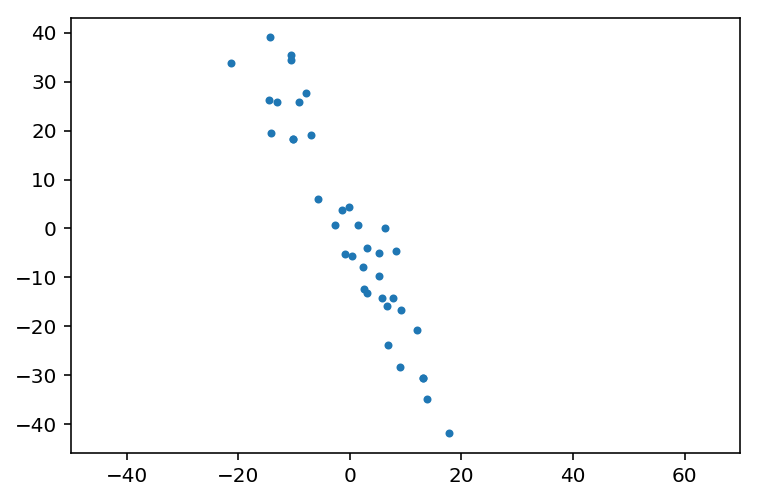

In [4]:
hwr = numpy.array(r * hwc)
pyplot.plot(hwr[0], hwr[1], marker='.', linestyle='')
pyplot.xlim(xmin=-50, xmax=70)

## Step 5: What is a Covariance Matrix?
A covariance matrix is a square table whose entries (i,j) show the covariance of coordinate i vs. coordinate j, and whose diagonal entries (i,i) show the variance of coordinate i.  A positive covariance implies a positive correlation between coordinates i and j.  It can be computed on a dataset using the numpy.cov() function:

In [5]:
print(numpy.cov(hw))

[[ 15.95035562  65.60156472]
 [ 65.60156472 551.24039829]]


## Step 6: Find Rotated Axes with Zero Covariance
For this simple two-dimensional dataset, it's easy to search all possible rotations (around the center of the data) for its "natural" coordinate system where the covariance goes to zero.  For each possible rotation, we calculate the rotated data's covariance matrix C, whose element C[0,0] is the variance of X', C[1,1] is the variance of Y', and C[0,1] is the covariance of X', Y':

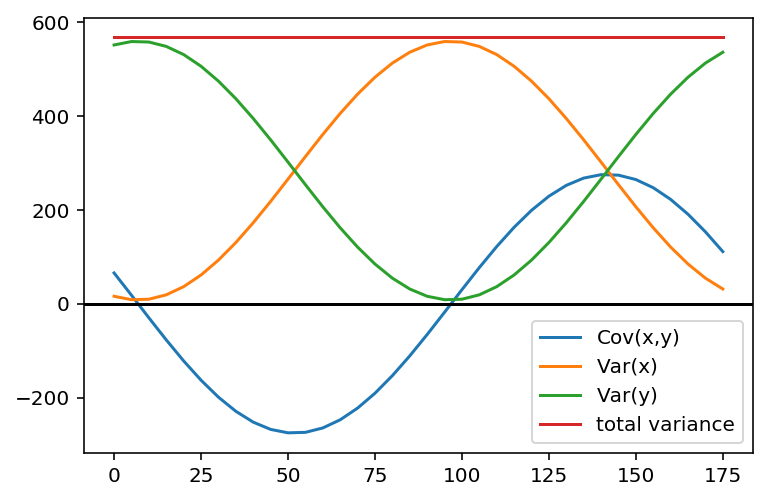

In [6]:
rots = numpy.arange(0, 180, 5) # from 0 to 180 degrees in 5 degree steps
cs = [numpy.cov(get_rotation_matrix(r) * hwc) for r in rots]
pyplot.plot(rots, [c[0,1] for c in cs], label='Cov(x,y)')
pyplot.plot(rots, [c[0,0] for c in cs], label='Var(x)')
pyplot.plot(rots, [c[1,1] for c in cs], label='Var(y)')
pyplot.plot(rots, [c[0,0] + c[1,1] for c in cs], label='total variance')
pyplot.axhline(0, color='k') # draw a line at y=0
pyplot.legend(loc='lower right')

## Step 7: General PCA Method for Finding the Principal Component Axes
We can find the principal component axes for any dataset, no matter how many dimensions, in a single step, by simply computing the so-called eigenvectors of the covariance matrix.  Numpy makes this easy.  The following example displays the PCA axes superimposed on the dataset; intuitively, you can see they provide the "natural coordinate system" that best fits the dataset:

(10, 130)

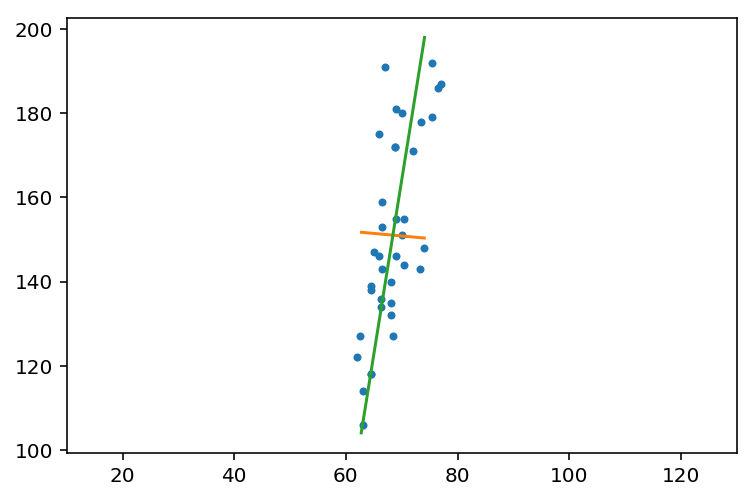

In [7]:
c = numpy.cov(hwc)
pca_variances, pca_axes = numpy.linalg.eig(c) # compute eigenvectors
a = numpy.array(pca_axes) * 2 * numpy.sqrt(pca_variances) # scale to 2 std. dev.
pyplot.plot(hw[0], hw[1], marker='.', linestyle='')
pyplot.plot([m[0]-a[0,0],m[0]+a[0,0]],[m[1]-a[1,0],m[1]+a[1,0]])
pyplot.plot([m[0]-a[0,1],m[0]+a[0,1]],[m[1]-a[1,1],m[1]+a[1,1]])
pyplot.xlim(xmin=10, xmax=130)

## Step 8: Reversing the PCA Rotation
Our pca_axes matrix transforms points in PCA coordinates to "real-world" coordinates (in this case, height and weight).  For the opposite conversion from real-world coordinates to PCA coordinates, we need the reverse rotation, which is called the inverse of the rotation matrix $R^{-1}$.  The following code example shows how to convert our height-weight dataset to PCA coordinates, graph them, and assess whether PCA actually eliminated all covariance (note that it is printed in scientific notation where "e-14" means "times 10 to the -14th power"):

[[ 8.02792108e+00 -2.13962208e-14]
 [-2.13962208e-14  5.59162833e+02]]


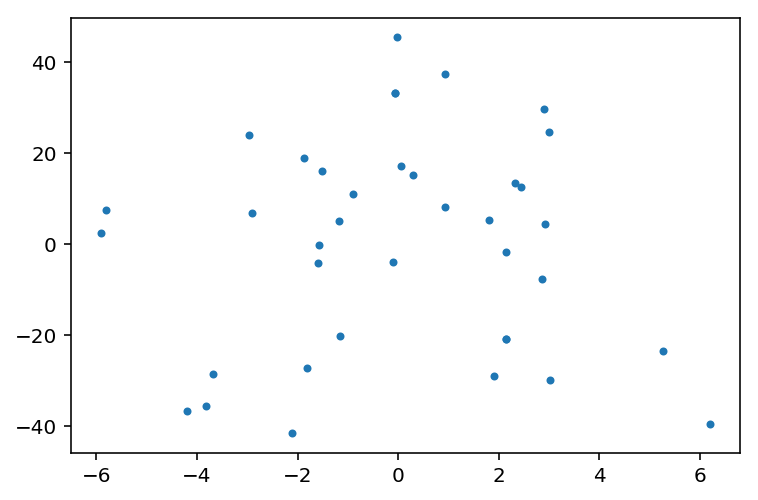

In [8]:
rinv = numpy.matrix(pca_axes).I # get the inverse rotation matrix
hwr = numpy.array(rinv * hwc) # transform to PCA coordinates
pyplot.plot(hwr[0], hwr[1], marker='.', linestyle='')
print(numpy.cov(hwr))

## Step 9: Sorting the PCA axes by Importance
As you can see in the example above, some PCA axes capture more of the inherent variance in the data than others.  We therefore sort the PCA axes from biggest to least variance, as follows:

In [9]:
print(pca_variances)
print(pca_axes)
pca_variances, pca_axes = sort_pca(pca_variances, pca_axes)
print('Reordered by variance:')
print(pca_variances)
print(pca_axes)

[  8.02792108 559.16283284]
[[-0.9927866  -0.11989481]
 [ 0.11989481 -0.9927866 ]]
Reordered by variance:
[559.16283284   8.02792108]
[[-0.11989481 -0.9927866 ]
 [-0.9927866   0.11989481]]


## Step 10: How Well Can We Model Height vs. Weight Using Just One Variable?
The value of sorting the PCA axes this way is that it provides a natural ordering for "compressing" the data as accurately as possible.  The following code example shows how accurately we can model the height vs. weight dataset using ONLY the first principal component (by just setting the second component to its mean value, zero), and then predicting both the height and weight from that value:

[[ 33.28432361   7.40958429 -20.84170052   4.43356477   4.94677215
   13.42859159 -23.48435487  17.18392734 -20.84170052  33.28432361
   -0.13705566  -3.98830726  -4.16814947   5.30645657  15.98731957
   23.86966498 -27.36192571  15.19835414 -28.9278671  -35.66390294
   29.61291422  18.96567937  37.43531222 -20.2325773   11.02338656
  -36.71663695  45.37760503  -7.65971665  24.58903381 -39.48883529
  -41.50072774 -29.80075889   8.22486897  -1.70299704   6.75250314
   12.43580498   2.36172492 -28.59450193]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.        ]]


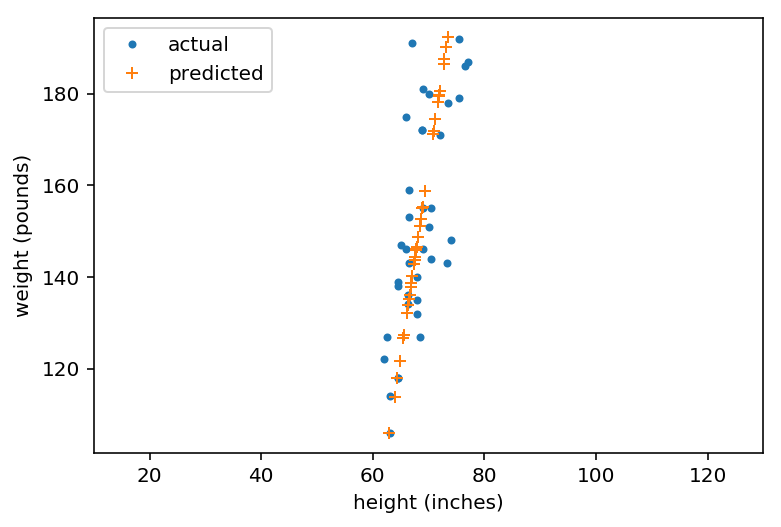

In [10]:
rinv = pca_axes.I # get the inverse rotation matrix
hwr = numpy.array(rinv * hwc) # transform to PCA coordinates
hwr[1] = 0 # set second PCA coordinate to zero
print(hwr)
hw2 = numpy.array(pca_axes * hwr + m) # predict height, weight
pyplot.plot(hw[0], hw[1], marker='.', linestyle='', label='actual')
pyplot.plot(hw2[0], hw2[1], marker='+', linestyle='', label='predicted')
pyplot.xlabel('height (inches)')
pyplot.ylabel('weight (pounds)')
pyplot.xlim(xmin=10, xmax=130)
pyplot.legend(loc='upper left')

Questions:

* Why do the predictions lie on a straight line?
* What do you expect to be the average error of these predictions?
* How much better are these predictions than the "naive prediction" $(\overline h, \overline w)$?
* What would happen if you changed the third line of code above to be "hwr[0]=0" (i.e. setting the First principal component to zero)?  Test your prediction by modifying the code and rerunning it.
* What would happen if you deleted the third line of code (i.e. leave both principal components unchanged)?  Test your prediction by modifying the code and rerunning it.

Answers:

* We used only a single dimension (first principal component) to model the data, so all its predictions will lie on a (one dimensional) line.
* The average error of our predictions will just be given by the variance of the second principal component (which we always just set to the mean value, zero), which was 8.03.
* If we used the naive prediction, the total variance would be increased by 559 (the variance of the first principal component).
* The predictions will all lie on the second principal component axis (rather than the first), and the resulting error will be a lot higher (variance=559, instead of variance=8).
* The predictions will perfectly match the original data.  All we have done is apply rotation matrix R followed by its inverse $R^{-1}$, which just gives us back our original dataset unchanged.

# Multidimensional Data Example: Obesity Dataset
## Step 1: Accuracy of Modeling These Data by PCA?
The power of PCA is that it works the same no matter how dimensions (variables) your dataset contains.  Here's a three dimensional dataset giving a sample of people's waist measurements (inches), weight (pounds), and body fat (percent).  First let's examine how well PCA can model these data, using the same approach as we used above:

In [11]:
rows = [[32, 175, 6], [36, 181, 21], [38, 200, 15], [33, 159, 6], [39, 196, 22], [40, 192, 31], [41, 205, 32], [35, 173, 21], [38, 187, 25], [38, 188, 30], [33, 188, 10], [40, 240, 20], [36, 175, 22], [32, 168, 9], [44, 246, 38], [33, 160, 10], [41, 215, 27], [34, 159, 12], [34, 146, 10], [44, 219, 28]]
wwb = numpy.array(rows).T # convert to column format
wwbc, wwbm = recenter(wwb) # center on (0,0)
c = numpy.cov(wwbc) # compute covariance matrix
pca_variances, pca_axes = numpy.linalg.eig(c) # compute PCA
pca_variances, pca_axes = sort_pca(pca_variances, pca_axes)
print(pca_variances)
print(pca_axes)
f = pca_variances.cumsum() / sum(pca_variances) # cumulative sum
pyplot.plot((1,2,3), f, marker='o')
pyplot.xlabel('Principal Component')
pyplot.ylabel('Fraction of Total Variance')

Questions:

* Interpret the meaning of this graph.
* Interpret the meaning of the first principal component (first column of pca_axes).
* Interpret the meaning of the second principal component (second column of pca_axes).

Answers:

* The graph shows that the first principal component, by itself, can model all three data variables (waist, weight, bodyfat) with an accuracy of 94% of the total variance.  This indicates that all three data variables are highly correlated.  Including the second principal component as well raises the accuracy to 99.8% of the variance.
* the first PCA axis (first column of pca_axes) has the same sign for all three variables (waist, weight, bodyfat, in that order), indicating that the main trend in the data is that all three are *positively* correlated with each other.  I.e. people with bigger waist measurement also tend to have higher weight and %bodyfat.
* the second PCA axis (second column of pca_axes) has the same sign for waist and bodyfat, but opposite sign for weight.  I.e. when waist and bodyfat vary independently of weight, they still correlate positively with each other (and very strongly -- only 0.2% of the total variance is left unexplained by these two PCA axes).

## Step 2: Predicting Waist and Weight from %bodyfat
We can use PCA as a prediction method, by simply computing the first principal component value for each %bodyfat value, and then using it to predict the waist and weight measurements for that person.  All we have to do is get the submatrix that maps the first principal component to %bodyfat.  Then to convert %bodyfat to first principal component, we just invert that matrix, and apply it to our %bodyfat data:

In [12]:
axes = (2,) # just use %bodyfat (data row 2)
pca_b = pca_axes[axes,:1] # get PCA column 0 vs. data row 2
print(pca_b)
binv = pca_b.I # inverse rotation matrix for converting %bodyfat to PCA
print(binv)
pc1 = binv * wwbc[axes,] # compute first principal component
print(pc1)
z = numpy.zeros(wwb.shape) # empty dataset (all values zero)
z[:1] = pc1 # insert first principal component values
wwb2 = numpy.array(pca_axes * z + wwbm) # predict waist and weight
pyplot.plot(wwb[0], wwb[1], marker='.', linestyle='', label='actual')
pyplot.plot(wwb2[0], wwb2[1], marker='+', linestyle='', label='predicted')
pyplot.xlabel('waist (inches)')
pyplot.ylabel('weight (pounds)')
pyplot.legend(loc='upper left')

## Step 3: Predicting %bodyfat from waist, weight
The same method can be used to predict all the variables from any subset of variables.  For example, waist and weight are trivial to measure (with just a measuring tape and scale), but %bodyfat is much harder to measure.  So it might be helpful to be able to predict %bodyfat from waist and weight measurements.  We reuse exactly the same procedure as above:

In [13]:
axes = (0,1) # use waist, weight (data rows 0 and 1)
pca_ww = pca_axes[axes,:len(axes)] # get PCA columns 0-1 vs. rows 0-1
print(pca_ww)
wwinv = pca_ww.I # inverse rotation matrix for converting ww to PCA
print(wwinv)
pc2 = wwinv * wwbc[axes,] # compute first two principal components
print(pc2)
z = numpy.zeros(wwb.shape) # empty dataset (all values zero)
z[:len(axes)] = pc2 # insert first two principal component values
wwb3 = numpy.array(pca_axes * z + wwbm) # predict %bodyfat
pyplot.plot(wwb[2], wwb3[2], marker='o', linestyle='')
pyplot.plot([5,40], [5,40]) # diagonal line from (5,5) to (40,40)
pyplot.xlabel('%bodyfat')
pyplot.ylabel('predicted %bodyfat')